# **Insper - Eletromagnetismo e Ondulatória** #


**Projeto - Vaga carregadora para o carrinho de Acionamentos Elétricos**



In [297]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt


Declarando as variáveis do transformador ($R_1$, $R_2$, $L_1$, $L_2$) e da fonte (frequência e tensão eficaz - Ufonte)

In [298]:
#frequência (Hz)
f = 60

#tensão eficaz (V)
V1 = 12

#dispersão
k = 0.2

#RC
Rcarga = 10

#Rdc
Rdc = 0.5


In [299]:
def CalcularCorrentesEmSerie(Uf, Rdc, Rc, XC, XL, XM):
    Z=np.array([[Rdc+XL+XC, -XM],[-XM, XL+XC+Rdc+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

def CalcularCorrentesEmParalelo(Uf, Rdc, Rc, XC, XL, XM):
    Z=np.array([[Rdc+XL+XC, -XM],[-XM, (XL+Rdc)+((XC*Rc)/(XC+Rc))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]


Para a capacitância de 0.15 µF
Para a capacitância de 0.10 µF
Para a capacitância de 0.47 µF
    Indutância: 39.64 µH
    Indutância: 39.21 µH
    Indutância: 26.51 µH
    Indutância: 26.27 µH
Para a capacitância de 1.00 µF
    Indutância: 83.32 µH
    Indutância: 56.13 µH
Para a capacitância de 4.70 µF


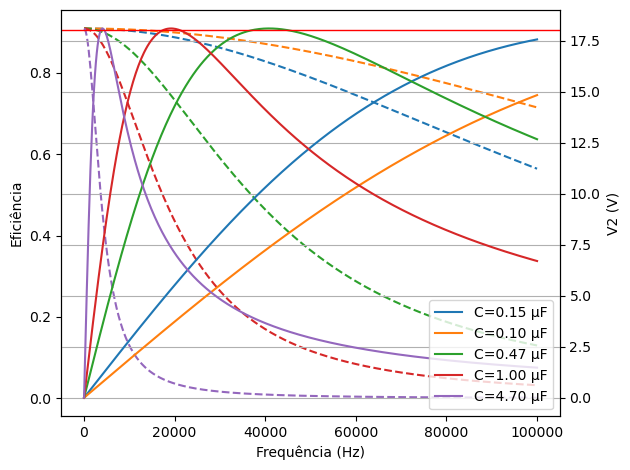

In [303]:

lista_capacitancias = [150*10**(-9), 0.1*10**(-6), 0.47*10**(-6), 10**(-6), 4.7*10**(-6)]

# lista de frequências de ressonância(de 0 a 100kHz)
frequencias = np.linspace(1, 100000, 500)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Eficiência')

ax2 = ax1.twinx()
ax2.set_ylabel('V2 (V)')

lista_x_pontos = []

# Em série
for C in lista_capacitancias:
    #print(f'Para a capacitância de {C} μF:')

    lista_eficiencia = []
    lista_V2 = []

    print(f'Para a capacitância de {C*1e6:.2f} µF')

    for fr in frequencias:
        w = 2*pi*fr
        L = 1/(w**2*C)
        XL = 1j*w*L
        M = k*L
        XM = 1j*w*M
        XC = 1/(1j*w*C)

        i1, i2 = CalcularCorrentesEmSerie(V1, Rdc, Rcarga, XC, XL, XM)

        V2 = i2*Rcarga
        lista_V2.append(abs(V2))
        
        if (abs(abs(V2) - 18) < 0.01):
            lista_x_pontos.append(fr)
            print(f'    Indutância: {L*1e6:.2f} µH')

        Pot_saida = np.real(V2*i2.conjugate()*(1/2))
        Pot_entrada = np.real(V1*i1.conjugate()*(1/2))

        Eficiencia = Pot_saida/Pot_entrada
        lista_eficiencia.append(Eficiencia)



    ax1.plot(frequencias, lista_eficiencia, "--",)

    ax2.plot(frequencias, lista_V2, label=f'C={C*1e6:.2f} µF')

fig.tight_layout()
ax2.axhline(18, color='red', linewidth=1)
#for x in lista_x_pontos:
#    ax2.axvline(x, color='red', linewidth=1)
plt.legend()
plt.grid()
plt.show()

Para a capacitância de 1.5000000000000002e-07 μF:
Para a capacitância de 1e-07 μF:
Para a capacitância de 4.6999999999999995e-07 μF:
Para a capacitância de 1e-06 μF:
Para a capacitância de 4.7e-06 μF:


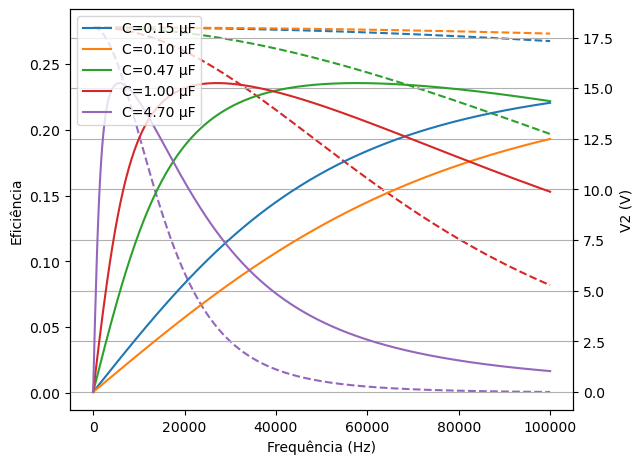

In [304]:

lista_capacitancias = [150*10**(-9), 0.1*10**(-6), 0.47*10**(-6), 10**(-6), 4.7*10**(-6)]

# lista de frequências de ressonância(de 0 a 100kHz)
frequencias = np.linspace(1, 100000, 500)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequência (Hz)')
ax1.set_ylabel('Eficiência')

ax2 = ax1.twinx()
ax2.set_ylabel('V2 (V)')

# Em série
for C in lista_capacitancias:
    print(f'Para a capacitância de {C} μF:')

    lista_eficiencia = []
    lista_V2 = []

    for fr in frequencias:
        w = 2*pi*fr
        L = 1/(w**2*C)
        XL = 1j*w*L
        M = k*L
        XM = 1j*w*M
        XC = 1/(1j*w*C)

        i1, i2 = CalcularCorrentesEmParalelo(V1, Rdc, Rcarga, XC, XL, XM)

        V2 = i2*((XC*Rcarga)/(XC+Rcarga))
        lista_V2.append(abs(V2))

        Pot_saida = np.real(V2*i2.conjugate()*(1/2))
        Pot_entrada = np.real(V1*i1.conjugate()*(1/2))

        Eficiencia = Pot_saida/Pot_entrada
        lista_eficiencia.append(Eficiencia)

    ax1.plot(frequencias, lista_eficiencia, "--",)

    ax2.plot(frequencias, lista_V2, label=f'C={C*1e6:.2f} µF')

fig.tight_layout()
ax2.axhline(18, color='blue', linestyle='', linewidth=1)
plt.legend()
plt.grid()
plt.show()

In [302]:
Rcarga = 5

lista_eficiencias_serie = []
lista_frequencia_serie = []
lista_V2_serie = []
lista_Rf_serie = []

lista_eficiencias_paralelo = []
lista_frequencia_paralelo = []
lista_V2_paralelo = []
lista_Rf_paralelo = []

# Em série

i1, i2 = CalcularCorrentesEmSerie(Ufonte, Rcarga, XC1, XC2)
i1_conjugada = np.conj(i1)
i2_conjugada = np.conj(i2)
V1 = Ufonte
V2 = np.abs(i2*Rcarga)
P_saida = np.real(V2*i2_conjugada*(1/2))
P_entrada = np.real(V1*i1_conjugada*(1/2))
Eficiencia = P_saida/P_entrada
frequencia = 1 / (2 * pi * sqrt(L1 * C1))
Rf = Rcarga + (Rcarga*frequencia)/(10**5)

lista_eficiencias_serie.append(Eficiencia)
lista_frequencia_serie.append(frequencia)
lista_V2_serie.append(V2)
lista_Rf_serie.append(Rf)

print('Com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.3f A' %np.abs(i1))
print('i2 (eficaz) = %.3f A' %np.abs(i2))
print(f'V1 (eficaz): {V1} V')
print(f'V2 (eficaz): {V2} V')

print('Potência de saída: %.3f W' %P_saida)
print('Potência de entrada: %.3f W' %P_entrada)
print('Eficiência: %.3f' %Eficiencia)

# print('Relação N1/N2: %.3f' %(np.abs(sqrt(L1/L2))))
# print('Relação i2/i1: %.3f' %(np.abs(i2)/np.abs(i1)))
# print('Relação V1/V2: %.3f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))

print('------------------------')

# Em paralelo
i1, i2 = CalcularCorrentesEmParalelo(Ufonte, Rcarga, XC1, XC2)
i1_conjugada = np.conj(i1)
i2_conjugada = np.conj(i2)
V1 = Ufonte
V2 = np.abs(i2*((XC2*Rcarga)/(XC2+Rcarga)))
P_saida = np.real(V2*i2_conjugada*(1/2))
P_entrada = np.real(V1*i1_conjugada*(1/2))
Eficiencia = P_saida/P_entrada
frequencia = 1 / (2 * pi * sqrt(L1 * C1))
Rf = Rcarga + (Rcarga*frequencia)/(10**5)

lista_eficiencias_paralelo.append(Eficiencia)
lista_frequencia_paralelo.append(frequencia)
lista_V2_paralelo.append(V2)
lista_Rf_paralelo.append(Rf)
print('Com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.3f A' %np.abs(i1))
print('i2 (eficaz) = %.3f A' %np.abs(i2))
print(f'V1 (eficaz): {V1} V')
print(f'V2 (eficaz): {V2} V')

print('Potência de saída: %.3f W' %P_saida)
print('Potência de entrada: %.3f W' %P_entrada)
print('Eficiência: %.3f' %Eficiencia)

print('--------------------------------------------------------')

# print('Relação N1/N2: %.3f' %(np.abs(sqrt(L1/L2))))
# print('Relação i2/i1: %.3f' %(np.abs(i2)/np.abs(i1)))
# print('Relação V1/V2: %.3f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))

TypeError: CalcularCorrentesEmSerie() missing 2 required positional arguments: 'XL' and 'XM'

c:\Users\GustavoTBraga\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


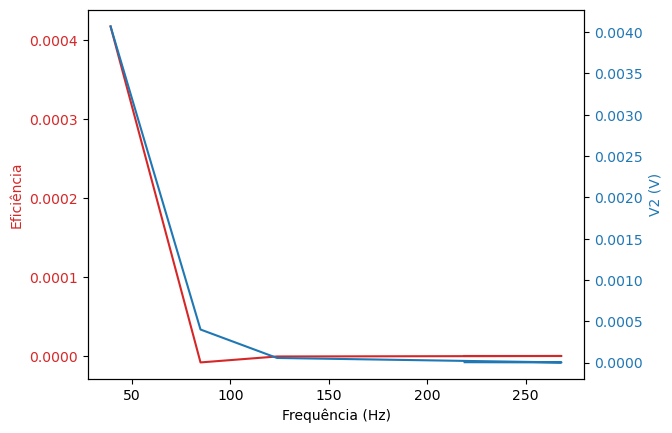

In [67]:
# Plot do gráfico de Eficiencia do WPT para k=0.2 e RCarga=5
# Eixo x deve ser a frequencia f (Hz) e o eixo y a eficiencia
# Além disso o eixo Y do lado direito deve ser o V2
# Vamos plotar uma curva para cada valor de capacitância
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
